# Projeto de Machine Learning caso Titanic

Projeto de ciência de dados que utiliza técnicas de machine learning, utilizando um conjunto de dados do Titanic do site Kaggle.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Leitura dos dados do Titanic

1. **train.csv:** Dataset contém 891 observações referentes a passageiros do Titanic.
2. **test.csv:** Dataset contém 418 observações e possui a mesma estrutura do `train.csv`, exceto pela não existência da coluna `Survived`.

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Essa etapa consiste na correção de dados incorretos, incompletos, irrelevantes, duplicados ou formatados incorretamente, caso existam.

In [12]:
# Identifica o número de amostras e atributos nos conjuntos de treino e teste
print("CONJUNTO DE TREINO")
print("Número de amostras:", df_train.shape[0])
print("Atributos:", df_train.shape[1])

print("\nCONJUNTO DE TESTE")
print("Número de amostras:", df_test.shape[0])
print("Atributos:", df_test.shape[1])

CONJUNTO DE TREINO
Número de amostras: 891
Atributos: 12

CONJUNTO DE TESTE
Número de amostras: 418
Atributos: 11


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Verifica-se, para ambos os conjuntos de treino e teste, que há atributos com valores nulos. Além disso, os tipos dos atributos estão coerentes de acordo com seu tipo de informação.

Agora, vamos identificar a quantidade de valores únicos nos atributos dos conjuntos de dados:

## Verificação de registros duplicados

In [15]:
print("CONJUNTO DE TREINO\n")
print(df_train.nunique())

print("\nCONJUNTO DE TESTE\n")
print(df_test.nunique())

CONJUNTO DE TREINO

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

CONJUNTO DE TESTE

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


Para ambos os conjuntos, `PassengerId` possui a mesma quantidade de valores únicos que o número total de amostras, indicando que não há duplicação de registros nos conjuntos.

## Valores nulos

Vamos verificar quais atributos possuem valores nulos, para ambos os conjuntos de treino e teste:

In [16]:
valores_nulos_treino = df_train.isnull().sum()

print("TREINO")

print("\nQuantidade de valores nulos\n")
print(valores_nulos_treino)

print("\nPorcentagem de valores nulos\n")
print((valores_nulos_treino[valores_nulos_treino > 0] / df_train.shape[0] * 100).round(2).sort_values(ascending=False))

TREINO

Quantidade de valores nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Porcentagem de valores nulos

Cabin       77.10
Age         19.87
Embarked     0.22
dtype: float64


Nota-se que o atributo `Cabin` possui uma grande quantidade de valores nulos.

O atributo `Age`, que pode ser importante para identificar os sobreviventes do acidente, possui aproximadamente 20% de valores nulos.

O atributo `Embarked` possui poucas amostras nulas, que não chegam a nem 1% do total de amostras.

In [17]:
valores_nulos_teste = df_test.isnull().sum()

print("TESTE")

print("\nQuantidade de valores nulos\n")
print(valores_nulos_teste)

print("\nPorcentagem de valores nulos\n")
print((valores_nulos_teste[valores_nulos_teste > 0] / df_test.shape[0] * 100).round(2).sort_values(ascending=False))

TESTE

Quantidade de valores nulos

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Porcentagem de valores nulos

Cabin    78.23
Age      20.57
Fare      0.24
dtype: float64


O conjunto de teste possui uma proporção de valores nulos muito semelhante à distribuição de valores nulos na partição de treino.

### Dataframe `dummy`

Uma cópia do conjunto de dados de treino com valores `dummy` será criada, com o nome de `df_train_dummy`.

Nessa cópia, valores nulos do atributo `Age` serão substituídos por um valor fictício e irreal para o contexto analisado. Esse Dataframe permitirá que esses dados sejam visualizados graficamente sem que haja alteração dos valores corretos.

In [18]:
# Criação da cópia do DataFrame df_train
df_train_dummy = df_train.copy()

# Agora, vamos substituir todos os valores ausentes na coluna 'Age' por 100
df_train_dummy['Age'] = df_train_dummy['Age'].fillna(100)

### Tratamento de valores nulos

#### Tratamento de Idade

Os valores nulos do atributo `Age` serão substituídos pela sua mediana agrupada por `Sex`:

In [19]:
print("Mediana da idade agrupada por sexo")

print("\nTREINO")
print(df_train.groupby('Sex').median(numeric_only=True)['Age'])

print("\nTESTE")
print(df_test.groupby('Sex').median(numeric_only=True)['Age'])

Mediana da idade agrupada por sexo

TREINO
Sex
female    27.0
male      29.0
Name: Age, dtype: float64

TESTE
Sex
female    27.0
male      27.0
Name: Age, dtype: float64


In [20]:
# Substituição de valores nulos da idade pelo valor da mediana agrupada por sexo
df_train['Age'] = df_train['Age'].fillna(value=df_train.groupby('Sex')['Age'].transform('median', numeric_only=True))
df_test['Age'] = df_test['Age'].fillna(value=df_test.groupby('Sex')['Age'].transform('median', numeric_only=True))

In [21]:
# Verifica se os valores nulos foram substituídos (TREINO)
valores_nulos_idade_treino = df_train[df_train['Age'].isnull()]

print("Quantidade de valores nulos para 'Age' no treino:", len(valores_nulos_idade_treino))
valores_nulos_idade_treino

Quantidade de valores nulos para 'Age' no treino: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
# Verifica se os valores nulos foram substituídos (TESTE)
valores_nulos_idade_teste = df_test[df_test['Age'].isnull()]

print("Quantidade de valores nulos para 'Age' no teste:", len(valores_nulos_idade_teste))
valores_nulos_idade_teste

Quantidade de valores nulos para 'Age' no teste: 0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Tratamento de Cabine

Para o atributo `Cabin`, todos os valores nulos serão substituídos por `NI`, que indica "Não informado".

In [23]:
# Substituir os valores ausentes na coluna 'Cabin' por NI (Não informado)
df_train['Cabin'] = df_train['Cabin'].fillna('NI')
df_test['Cabin'] = df_test['Cabin'].fillna('NI')

In [24]:
print("Quantidade de dados nulos após substituição (TREINO):", df_train['Cabin'].isnull().sum())
print("Quantidade de dados nulos após substituição (TESTE):", df_test['Cabin'].isnull().sum())

Quantidade de dados nulos após substituição (TREINO): 0
Quantidade de dados nulos após substituição (TESTE): 0


#### Tratamento do Local de Embarque

Assim como o atributo `Cabin`, o atributo `Embarked` terá todos os valores nulos serão substituídos por NI, que indica "Não informado".

Apenas o conjunto de treino terá valores alterados, visto que o conjunto de teste não possui valores nulos para esse atributo.

In [25]:
# Substituir os valores ausentes na coluna 'Embarked' por NI (Não informado)
df_train['Embarked'] = df_train['Embarked'].fillna('NI')

In [26]:
print("Quantidade de dados nulos após substituição (TREINO):", df_train['Embarked'].isnull().sum())

Quantidade de dados nulos após substituição (TREINO): 0


#### Tratamento da Tarifa

Assim como o atributo `Age`, os valores nulos de `Fare` serão substituídos por sua mediana.

Apenas o conjunto de teste terá valores alterados, visto que o conjunto de treino não possui valores nulos para esse atributo.

In [27]:
# Substituição de valores nulos de 'Fare' por sua mediana
mediana_fare_teste = df_test['Fare'].median()
df_test['Fare'] = df_test['Fare'].fillna(mediana_fare_teste)

## Análise Exploratória de Dados

Nessa etapa, os atributos serão analisados por meio de diferentes tipos de gráfico.

### **Gráfico de Distribuição de Classes**

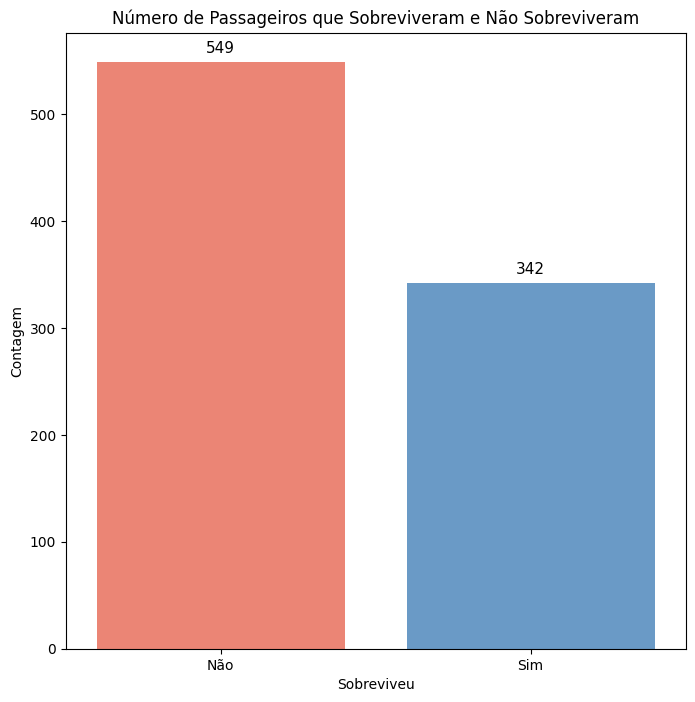

In [28]:
cores_barras = ['#FF7761', '#5b9bd5']

plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Survived', data=df_train, hue='Survived', legend=False, palette=cores_barras)

# Adicionar anotações com o número de contagem
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Número de Passageiros que Sobreviveram e Não Sobreviveram')
plt.xlabel('Sobreviveu')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

### Atributo Sexo

#### **Gráfico de Sobreviventes vs Não Sobreviventes por Sexo**

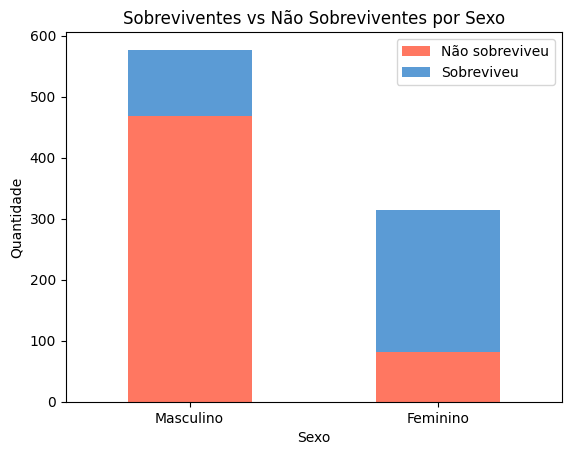

In [29]:
# Gráfico de barras empilhadas: quantidade de pessoas que sobreviveram por sexo
sobrev_sexo = df_train.groupby(['Sex', 'Survived']).size().unstack()
sobrev_sexo = sobrev_sexo.sort_index(ascending=False)

sobrev_sexo.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])

plt.title('Sobreviventes vs Não Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'], rotation=0)
plt.legend(['Não sobreviveu', 'Sobreviveu'])

plt.show()

### Atributo Idade

#### **Gráfico de Distribuição de Idade**

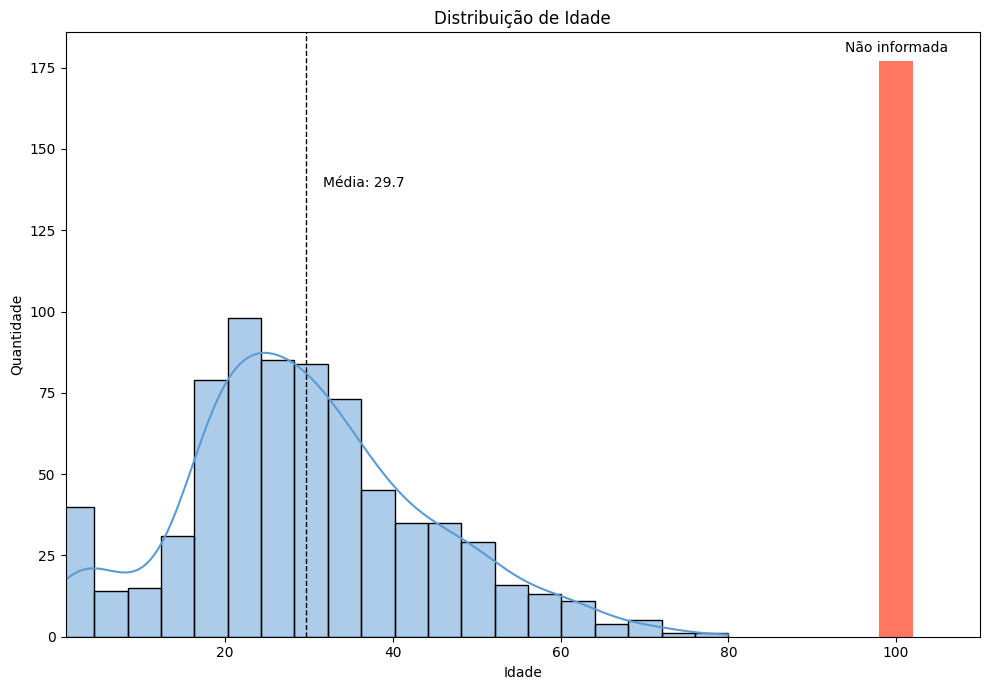

In [30]:
plt.figure(figsize=(10, 7))

# Calcula a média das idades excluindo os valores dummy
idade_media = df_train_dummy[df_train_dummy['Age'] != 100]['Age'].mean()

# Plotar histograma para as idades que não são dummy
sns.histplot(df_train_dummy[df_train_dummy['Age'] != 100]['Age'], bins=20, kde=True, color='#5b9bd5')

# Plotar a barra para os valores dummy
contagem_nao_informada = df_train_dummy['Age'].value_counts()[100]
plt.bar(100, contagem_nao_informada, color='#FF7761', width=4) 

# Desenhar a linha de média
plt.axvline(idade_media, color='k', linestyle='--', linewidth=1)

# Adicionar anotação para a linha de média um pouco para o lado
plt.text(idade_media + 2, plt.gca().get_ylim()[1] * 0.75, f'Média: {idade_media:.1f}', 
         ha='left', va='center', backgroundcolor='white')

# Adicionar anotação para a barra de valores dummy, garantindo que não toque nas bordas do gráfico
plt.text(100, contagem_nao_informada + plt.gca().get_ylim()[1] * 0.01, 'Não informada', 
         ha='center', va='bottom', color='black')

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.xlim(1, max(df_train_dummy['Age']) + 10)
plt.tight_layout()  # Ajusta o layout para garantir que o texto não toque na borda do gráfico

plt.show()

#### **Gráfico de Sobrevivência por Faixa Etária**

In [31]:
bins = [0, 12, 18, 60, 99,101]
labels = ['Criança', 'Jovem', 'Adulto', 'Idoso', 'Não informado']
df_train_dummy['Faixa_Etaria'] = pd.cut(df_train_dummy['Age'], bins=bins, labels=labels, right=False)

<Figure size 1000x1100 with 0 Axes>

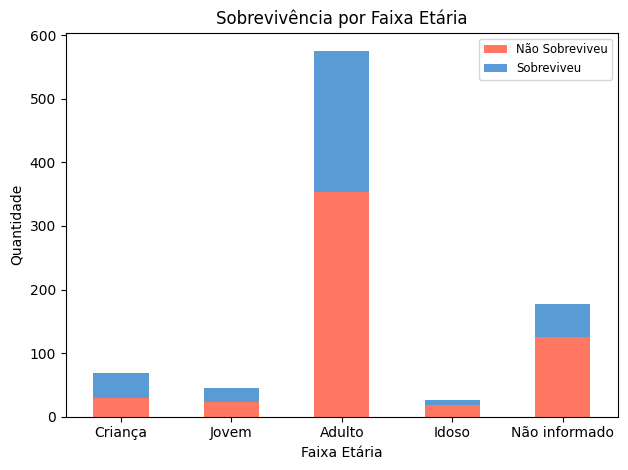

In [32]:
age_survival = df_train_dummy.groupby(['Faixa_Etaria', 'Survived'], observed=True).size().unstack()

plt.figure(figsize=(10, 11))
age_survival.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])

plt.title('Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right', fontsize='small')
plt.tight_layout()

plt.show()

### Atributo Classe

#### **Gráfico de Quantidade de Pessoas a Bordo por Classe de Passageiro**

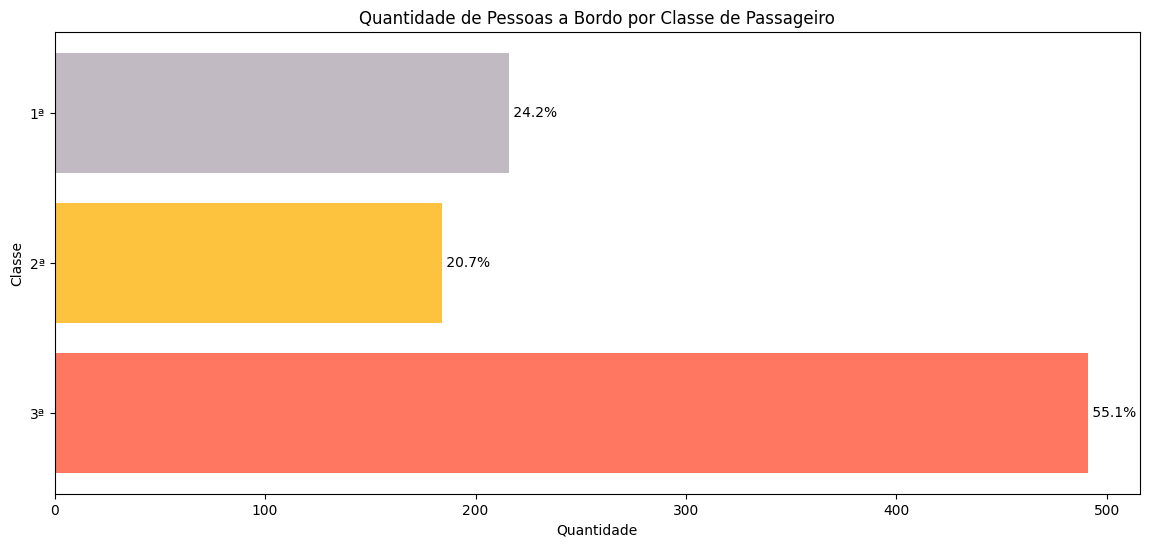

In [33]:
# Contagem da quantidade de pessoas por classe
qtd_classes = df_train['Pclass'].value_counts()
qtd_classes = qtd_classes.sort_index(ascending=False)

# Nomes das classes para legenda
legenda_classe = [f'{int(classe)}ª' for classe, count in qtd_classes.items()]
legenda_classe.sort(reverse=True)

# Criação do gráfico de barras
plt.figure(figsize=(14, 6))
bars = plt.barh(legenda_classe, qtd_classes, color=['#FF7761', '#FDC23E','#C2BAC2'])

plt.title('Quantidade de Pessoas a Bordo por Classe de Passageiro')
plt.ylabel('Classe')
plt.xlabel('Quantidade')

# Calcular o total para a porcentagem
total = sum(qtd_classes)

# Adicionar anotação de porcentagem
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {bar.get_width()/total:.1%}',
             va='center', ha='left')

plt.show()

#### **Gráfico de Sobrevivência por Classe de Passageiro**

<Figure size 1000x800 with 0 Axes>

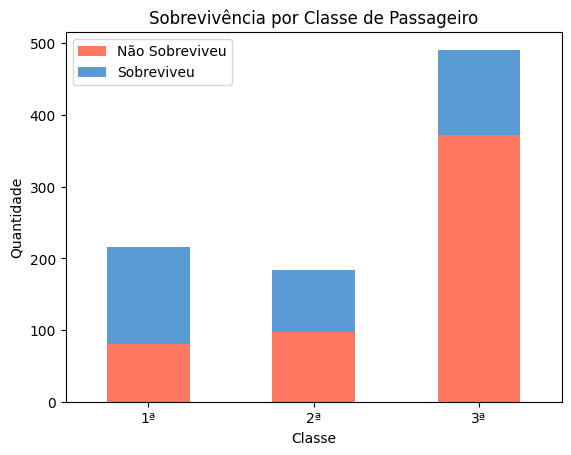

In [34]:
sobreviventes_classe = df_train.groupby(['Pclass', 'Survived']).size().unstack()

plt.figure(figsize=(10, 8))
sobreviventes_classe.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])

plt.title('Sobrevivência por Classe de Passageiro')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(ticks=[0, 1, 2], labels=['1ª', '2ª', '3ª'], rotation=0)
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper left')

plt.show()

#### **Gráfico de Porcentagem de Crianças que Sobreviveram por Classe**

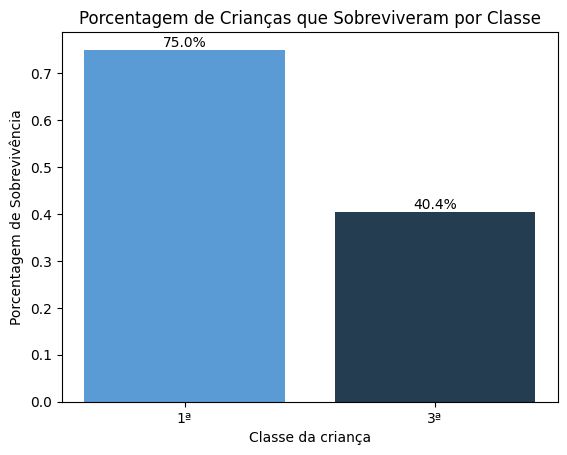

In [35]:
criancas = df_train_dummy[(df_train_dummy['Faixa_Etaria'] == 'Criança') & (df_train['Pclass'].isin([1, 3]))]

# Agrupar por 'Pclass' e 'Survived', contando o número de crianças
criancas_sobreviventes = criancas.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Calcular a porcentagem de sobreviventes em cada classe
criancas_sobreviventes['Total'] = criancas_sobreviventes.sum(axis=1)
criancas_sobreviventes['Porcentagem Sobreviveu'] = criancas_sobreviventes[1] / criancas_sobreviventes['Total']

# Definindo cores para as barras
cores_barras = ['#5b9bd5', '#243D51']  # Verde para sobreviveu, Vermelho para não sobreviveu

# Criar o gráfico de barras para as porcentagens
bars = plt.bar(['1ª', '3ª'], criancas_sobreviventes['Porcentagem Sobreviveu'], color=cores_barras)

plt.title('Porcentagem de Crianças que Sobreviveram por Classe')
plt.xlabel('Classe da criança')
plt.ylabel('Porcentagem de Sobrevivência')

# Adicionar rótulos de porcentagem nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1%}', ha='center', va='bottom')

plt.show()

### Atributo Embarcação

#### **Gráfico de Quantidade de Pessoas que Embarcaram por Porto**

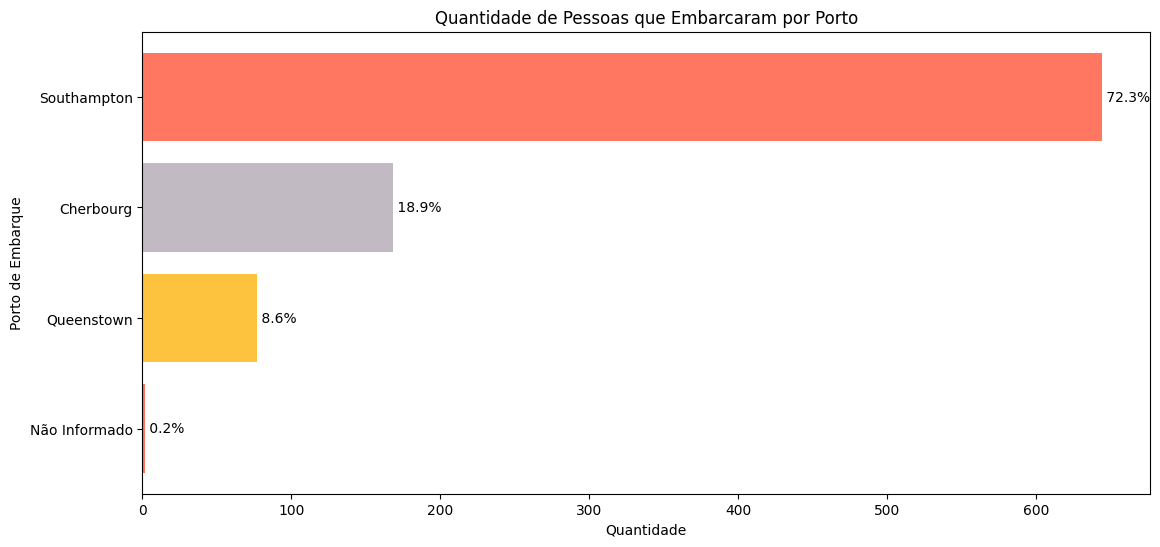

In [36]:
# Contagem da quantidade de pessoas por classe
qtd_embarcado = df_train['Embarked'].value_counts()

# Nomes dos portos para a legenda
porto_nomes = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton', 'NI': 'Não Informado'}
legenda_embarcacao = [porto_nomes.get(porto, 'Não Informado') for porto in qtd_embarcado.index]
legenda_embarcacao = legenda_embarcacao[::-1]
qtd_embarcado = qtd_embarcado.iloc[::-1]

# Criação do gráfico de barras
plt.figure(figsize=(13, 6))
bars = plt.barh(legenda_embarcacao, qtd_embarcado, color=['#FF7761', '#FDC23E','#C2BAC2'])

plt.title('Quantidade de Pessoas que Embarcaram por Porto')
plt.ylabel('Porto de Embarque')
plt.xlabel('Quantidade')

# Calcular o total para a porcentagem
total = sum(qtd_embarcado)

# Adicionar anotação de porcentagem
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {bar.get_width()/total:.1%}',
             va='center', ha='left')

plt.show()

#### **Gráfico de Sobreviventes por Local de Embarque**

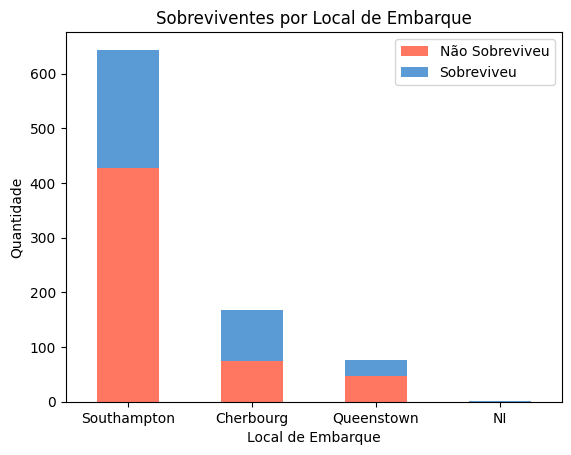

In [37]:
sobreviventes_embarcacao = df_train.groupby(['Embarked', 'Survived']).size().unstack()

# Mapeamento dos nomes dos portos para os rótulos do eixo x
porto_nomes = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton', 'NI': 'NI'}
nova_ordem = ['S', 'C', 'Q', 'NI']
sobreviventes_embarcacao = sobreviventes_embarcacao.reindex(nova_ordem)

# Criar o gráfico de barras empilhadas para mostrar os sobreviventes por local de embarque
sobreviventes_embarcacao.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])

# Ajustar os rótulos do eixo x para exibir os nomes completos dos portos
plt.xticks(ticks=range(len(porto_nomes)), labels=[porto_nomes.get(label.get_text(), label.get_text()) for label in plt.gca().get_xticklabels()], rotation=0)

plt.title('Sobreviventes por Local de Embarque')
plt.xlabel('Local de Embarque')
plt.ylabel('Quantidade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')

plt.show()

### Irmãos/Cônjuges e Pais/Filhos

#### **Gráficos de Distribuição de Irmãos/Cônjuges e Pais/Filhos**

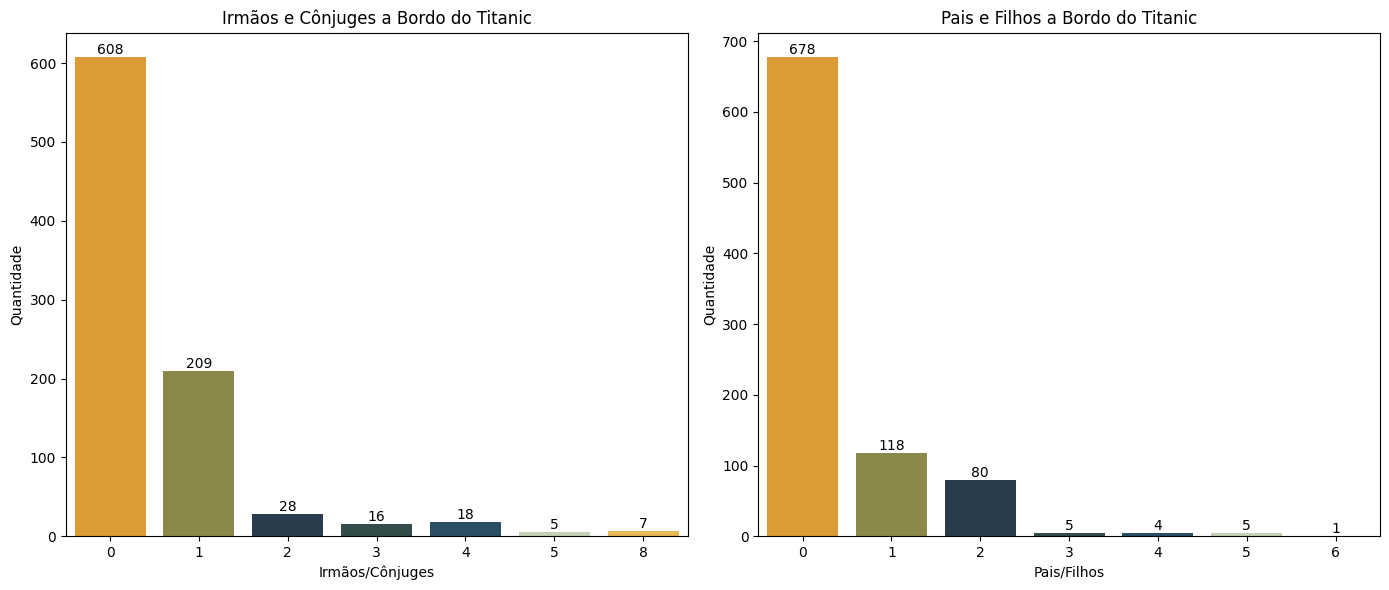

In [38]:
# Criar os barplots para as colunas 'Irmãos/Cônjuges' e 'Pais/Filhos'
plt.figure(figsize=(14, 6))

cores_barras= ['#F9A11B','#97913F','#243D51','#30504E','#22516D','#C4D6B0','#FDC23E']

# Barplot para 'Irmãos/Cônjuges'
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, posição 1
ax1 = sns.countplot(x='SibSp', hue='SibSp', legend=False, data=df_train,palette=cores_barras)
plt.title('Irmãos e Cônjuges a Bordo do Titanic')
plt.ylabel('Quantidade')
plt.xlabel('Irmãos/Cônjuges')

# Adicionar numeração em cada barra para 'Irmãos/Cônjuges'
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Barplot para 'Pais/Filhos'
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, posição 2
ax2 = sns.countplot(x='Parch', hue='Parch', legend=False, data=df_train,palette=cores_barras)
plt.title('Pais e Filhos a Bordo do Titanic')
plt.ylabel('Quantidade')
plt.xlabel('Pais/Filhos')

# Adicionar numeração em cada barra para 'Pais/Filhos'
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

#### **Gráfico de Sobreviventes por Número de Irmãos/Cônjuges e Pais/Filhos**

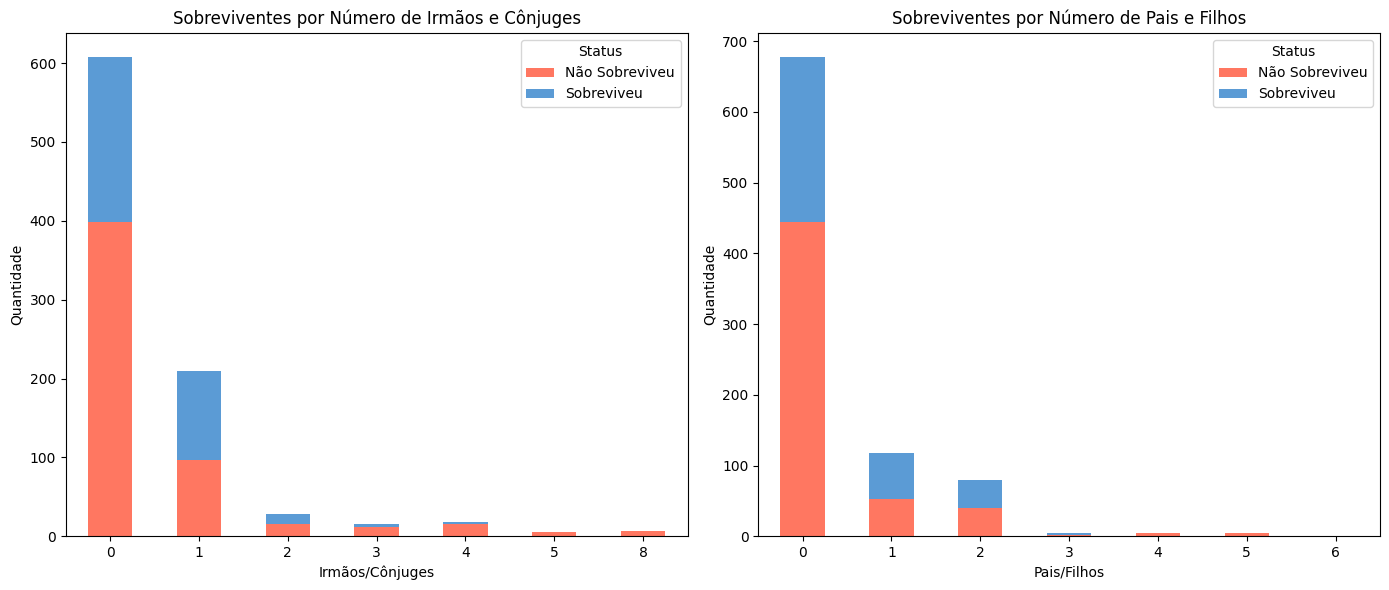

In [39]:
sibsp_sobrev = df_train.groupby(['SibSp', 'Survived']).size().unstack()
parch_sobrev = df_train.groupby(['Parch', 'Survived']).size().unstack()

plt.figure(figsize=(14, 6))

# Gráfico para 'Irmãos/Cônjuges'
plt.subplot(1, 2, 1)
sibsp_sobrev.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'], ax=plt.gca())
plt.title('Sobreviventes por Número de Irmãos e Cônjuges')
plt.ylabel('Quantidade')
plt.xlabel('Irmãos/Cônjuges')
plt.legend(title='Status', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.xticks(rotation=0)

# Gráfico para 'Pais/Filhos'
plt.subplot(1, 2, 2)
parch_sobrev.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'], ax=plt.gca())
plt.title('Sobreviventes por Número de Pais e Filhos')
plt.ylabel('Quantidade')
plt.xlabel('Pais/Filhos')
plt.legend(title='Status', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Data Wrangling

O objetivo dessa etapa é preparar os dados para a etapa de modelagem, separando-os entre *features* e *target*.

### Conversão de Sexo

O atributo `Sex` possui os valores `male` e `female`, indicando masculino e feminino.

Para ambos os conjuntos de treino e teste, mapeamos esse atributo para os valores 0 e 1.

In [40]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

### One-Hot Encoding para a Classe de Passageiro

A técnica de *One-Hot Encoding* tem como objetivo transformar cada valor de um atributo categórico em atributos binários, que possam ser identificados matematicamente.

In [41]:
# Aplicando One-Hot Encoding na variável 'Pclass' (TREINO)
pclass_one_hot = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

# Adicionando novas colunas do Dataframe de treino
df_train = pd.concat([df_train, pclass_one_hot], axis=1)

# Visualizando o resultado do One-Hot Encoding
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NI,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NI,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NI,S,False,False,True


In [42]:
# Aplicando One-Hot Encoding na variável 'Pclass' (TESTE)
pclass_one_hot = pd.get_dummies(df_test['Pclass'], prefix='Pclass')

df_test = pd.concat([df_test, pclass_one_hot], axis=1)

# Visualizando o resultado do One-Hot Encoding
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NI,Q,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NI,S,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NI,Q,False,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NI,S,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NI,S,False,False,True


# Função de Regressão Logística

A Regressão Logística é utilizada para calcular os possíveis sobreviventes no naufrágio do Titanic.

Inicialmente, uma função *logit*, apresentada abaixo, é utilizada para possibilitar a interpretação dos resultados em função da Razão de Chances.

$$
g(X) = -1,33 + 2,55 * (I_{feminino}) + 1,27 * (I_{2ª classe}) + 2,58 * (I_{1ª classe}) - 0,04 * ({Idade})
$$

Para calcular a probabilidade de sobrevivência de um indivíduo, a função $E(Y)$, apresentada abaixo, é utilizada:

$$
E(Y) = \frac{e^{g(x)}}{1 + e^{g(x)}}
$$

In [43]:
def calcular_prob_sobrevivencia(row):
  g_x = -1.33 + 2.55 * row['Sex'] + 1.27 * (row['Pclass_2']) + 2.58 * (row['Pclass_1']) - 0.04 * row['Age']
  probability = np.exp(g_x) / (1 + np.exp(g_x))
  return 1 if probability >= 0.5 else 0

In [44]:
# Aplicar a função ao dataframe e criar a coluna de sobrevivência prevista
df_test['Survival'] = df_test.apply(calcular_prob_sobrevivencia, axis=1)

# Armazena a nova coluna em uma variável para que possamos utilizá-la posteriormente
sobrev_calculados = df_test['Survival']

In [45]:
df_test.drop(['Pclass_1','Pclass_2','Pclass_3'], axis = 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NI,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NI,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NI,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NI,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NI,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,NI,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NI,S,0
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,NI,S,0


In [46]:
num_total_passageiros = len(df_test)
num_sobreviventes = len(df_test.loc[df_test['Survival'] == 1])
num_nao_sobreviventes = len(df_test.loc[df_test['Survival'] == 0])

print("Total de passageiros no conjunto de teste:", num_total_passageiros)
print("Número de sobreviventes:", num_sobreviventes)
print("Número de não sobreviventes:", num_nao_sobreviventes)

print(f"\n{round((num_sobreviventes / num_total_passageiros * 100), 2)}% dos passageiros sobreviveram.")
print(f"\n{round((num_nao_sobreviventes / num_total_passageiros * 100), 2)}% dos passageiros não sobreviveram.")

Total de passageiros no conjunto de teste: 418
Número de sobreviventes: 164
Número de não sobreviventes: 254

39.23% dos passageiros sobreviveram.

60.77% dos passageiros não sobreviveram.


# Análise dos Dados de Teste

Nessa etapa, analisaremos graficamente o conjunto de teste com base nos indivíduos identificados como sobreviventes ou não.

## Gráfico de Distribuição de Possíveis Sobreviventes e Não Sobreviventes

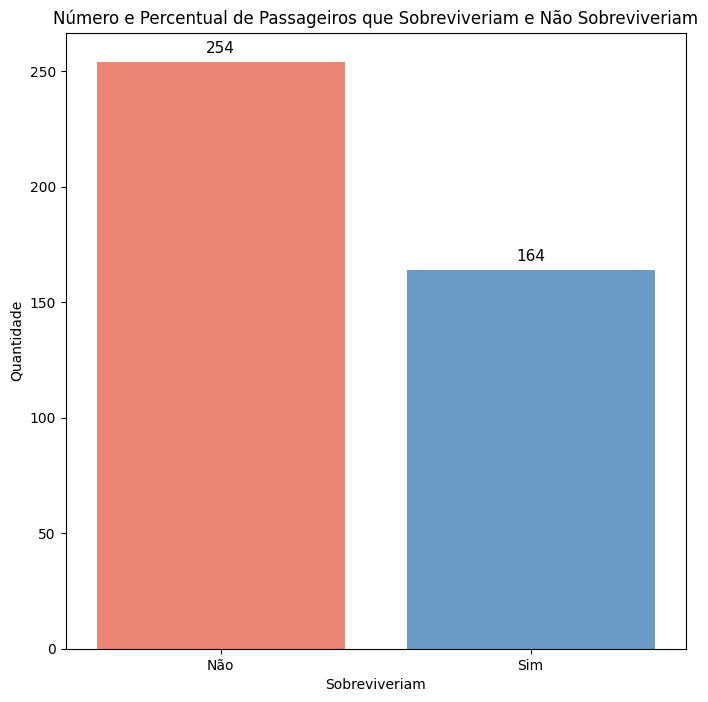

In [47]:
cores_barras = ['#FF7761', '#5b9bd5']

plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Survival', hue='Survival', legend=False, data=df_test, palette=cores_barras)

# Calcular o número total de passageiros
total_passageiros = len(df_test)

# Adicionar anotações com o número de contagem e o percentual
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Número e Percentual de Passageiros que Sobreviveriam e Não Sobreviveriam')
plt.xlabel('Sobreviveriam')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Não', 'Sim'])  # Renomeia os ticks para serem mais descritivos

plt.show()

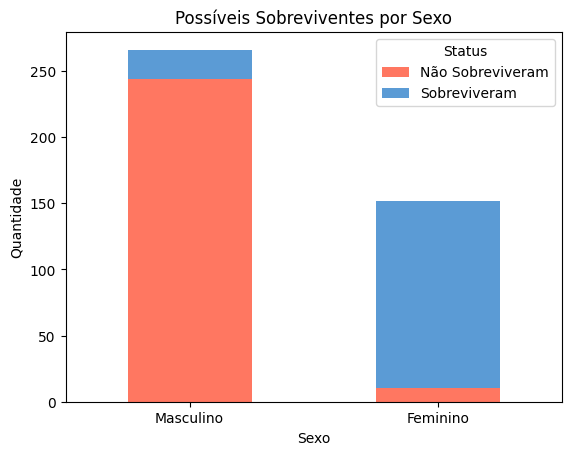

In [48]:
# Gráfico de barras empilhadas: quantidade de pessoas que sobreviveram por sexo
survived_sex = df_test.groupby(['Sex', 'Survival']).size().unstack()

survived_sex.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])
plt.title('Possíveis Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'], rotation=0)
plt.legend(['Não Sobreviveram', 'Sobreviveram'], title='Status')

plt.show()

<Figure size 1000x800 with 0 Axes>

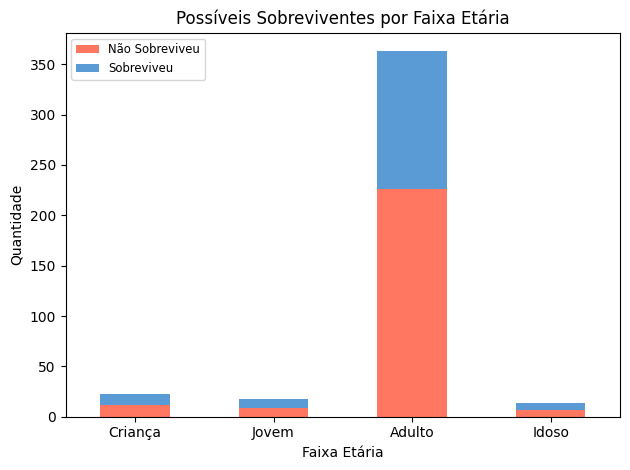

In [49]:
bins = [0, 12, 18, 60, 99]
labels = ['Criança', 'Jovem', 'Adulto', 'Idoso']
df_test['Faixa_Etaria'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)
age_survival = df_test.groupby(['Faixa_Etaria', 'Survival'], observed=True).size().unstack()
plt.figure(figsize=(10, 8))  # Definir o tamanho da figura
age_survival.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])

plt.title('Possíveis Sobreviventes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper left', fontsize='small')
plt.tight_layout()

plt.show()

<Figure size 1000x800 with 0 Axes>

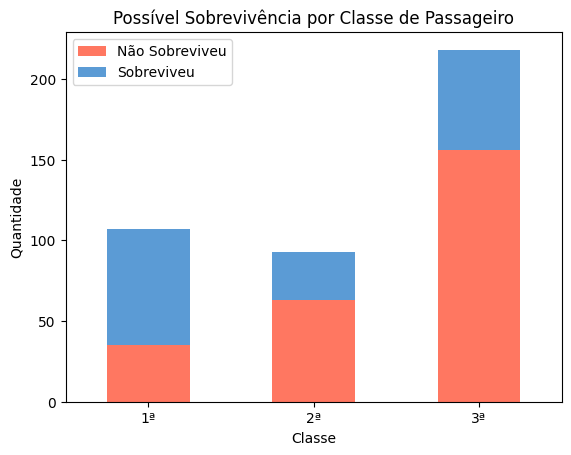

In [50]:
class_survival = df_test.groupby(['Pclass', 'Survival']).size().unstack()

plt.figure(figsize=(10, 8))  # Tamanho do gráfico
class_survival.plot(kind='bar', stacked=True, color=['#FF7761', '#5b9bd5'])

plt.title('Possível Sobrevivência por Classe de Passageiro')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(ticks=[0, 1, 2], labels=['1ª', '2ª', '3ª'], rotation=0)
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper left')
plt.show()

# Exportação da base de dados de teste final

Após o cálculo dos possíveis sobreviventes e não sobreviventes no conjunto de teste, o arquivo de teste é carregado novamente, e a coluna com os resultados encontrados, `Survival`, é adicionada ao conjunto de teste inicial.

Esse novo arquivo, agora com o atributo alvo, é exportado para o arquivo CSV `test_with_survival.csv`, e pode ser enviado para o cliente caso seja desejado.

In [51]:
# Carregamento do conjunto de dados de teste
df_test_final = pd.read_csv('test.csv')

In [52]:
# Adição do atributo 'Survival' no conjunto de teste
df_test_final['Survival'] = sobrev_calculados

In [53]:
# Exportação para um arquivo CSV
df_test_final.to_csv("test_with_survival.csv", index=False)

In [54]:
# Observação dos primeiro registros do conjunto de dados de teste, agora com 'Survival'
df_test_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
